In [5]:
!pip install findspark

  Using cached findspark-2.0.1-py2.py3-none-any.whl.metadata (352 bytes)
Using cached findspark-2.0.1-py2.py3-none-any.whl (4.4 kB)


In [7]:
print("HomeWork")

HomeWork


In [6]:
# Homework
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Membuat Spark session
spark = SparkSession.builder.appName("HomeworkDataAnalysis").getOrCreate()
import random
import matplotlib.pyplot as plt

departments = ["HR", "Finance", "IT", "Marketing", "Operations", "R&D"]
names = [f"Karyawan_{i}" for i in range(120)]

data = []
for i, name in enumerate(names):
    dept = random.choice(departments)
    age = random.randint(22, 55)
    salary = random.randint(4_000_000, 15_000_000)
    data.append((i + 1, name, dept, age, salary))

columns = ["EmpID", "Name", "Department", "Age", "Salary"]
df = spark.createDataFrame(data, columns)
df.createOrReplaceTempView("employees")

df.show(5)

25/10/26 09:54:18 WARN Utils: Your hostname, senandung-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/10/26 09:54:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/26 09:54:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+-----+----------+----------+---+--------+
|EmpID|      Name|Department|Age|  Salary|
+-----+----------+----------+---+--------+
|    1|Karyawan_0|   Finance| 29|11485545|
|    2|Karyawan_1|        HR| 34| 5102098|
|    3|Karyawan_2| Marketing| 39| 4928544|
|    4|Karyawan_3|   Finance| 48|10002856|
|    5|Karyawan_4|Operations| 29| 9173889|
+-----+----------+----------+---+--------+
only showing top 5 rows



Total gaji dan jumlah karyawan per departemen:


+----------+------------+---------------+
|Department|Total_Salary|Total_Employees|
+----------+------------+---------------+
|Operations|   236592484|             25|
|       R&D|   231411439|             21|
|   Finance|   218872351|             23|
| Marketing|   171652112|             18|
|        IT|   164421901|             17|
|        HR|   149256502|             16|
+----------+------------+---------------+



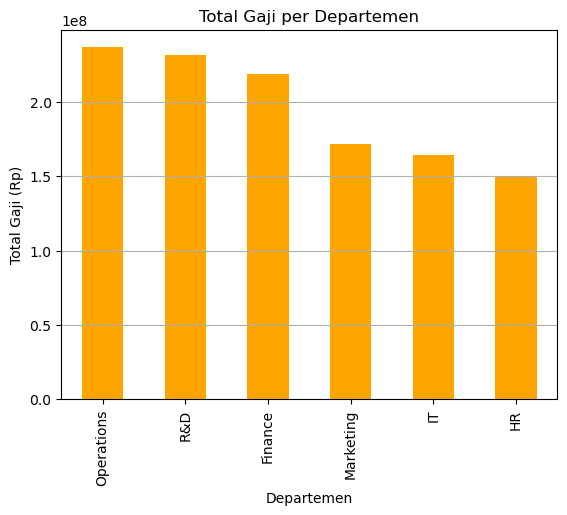

In [9]:
# Tugas 1 Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
print("Total gaji dan jumlah karyawan per departemen:")

df.createOrReplaceTempView("employees")

tugas1 = spark.sql("""
    SELECT 
        Department,
        SUM(Salary) AS Total_Salary,
        COUNT(*) AS Total_Employees
    FROM employees
    GROUP BY Department
    ORDER BY Total_Salary DESC
""")
tugas1.show()

pdf1 = tugas1.toPandas()
pdf1.plot(kind='bar', x='Department', y='Total_Salary', legend=False, color='orange')
plt.title("Total Gaji per Departemen")
plt.xlabel("Departemen")
plt.ylabel("Total Gaji (Rp)")
plt.grid(axis='y')
plt.show()

Karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia 


+-----------+---------+--------+----------+
|       Name|Age_Group|  Salary|Avg_Salary|
+-----------+---------+--------+----------+
| Karyawan_9|   Dewasa|12222714| 9229882.5|
|Karyawan_13|   Dewasa|14771193| 9229882.5|
|Karyawan_16|   Dewasa|12022240| 9229882.5|
|Karyawan_31|   Dewasa|13992152| 9229882.5|
|Karyawan_33|   Dewasa|14854836| 9229882.5|
|Karyawan_50|   Dewasa|11457203| 9229882.5|
|Karyawan_51|   Dewasa|10681419| 9229882.5|
|Karyawan_55|   Dewasa|10671921| 9229882.5|
|Karyawan_75|   Dewasa|11364077| 9229882.5|
|Karyawan_83|   Dewasa|14509577| 9229882.5|
+-----------+---------+--------+----------+
only showing top 10 rows



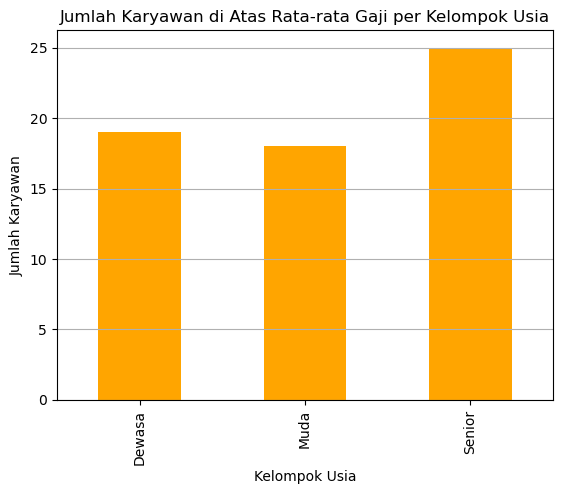

In [10]:
# Tugas 2 Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
print("Karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia ")

from pyspark.sql.functions import when, col, avg, sum, count

df = df.withColumn(
    "Age_Group",
    when(col("Age") < 30, "Muda")
    .when((col("Age") >= 30) & (col("Age") < 40), "Dewasa")
    .otherwise("Senior")
)

df.createOrReplaceTempView("employees")

tugas2 = spark.sql("""
    SELECT 
        Name, 
        Age_Group, 
        Salary,
        AVG(Salary) OVER (PARTITION BY Age_Group) AS Avg_Salary
    FROM employees
""")

above_avg = tugas2.filter(col("Salary") > col("Avg_Salary"))
above_avg.show(10)

pdf2 = above_avg.toPandas()
pdf2.groupby("Age_Group")["Name"].count().plot(kind='bar', color='orange')
plt.title("Jumlah Karyawan di Atas Rata-rata Gaji per Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Karyawan")
plt.grid(axis='y')
plt.show()

+----------+---------------+----------+----------+-------------------+
|Department|Jumlah_Karyawan|Rata2_Gaji|Total_Gaji|Anggaran_Departemen|
+----------+---------------+----------+----------+-------------------+
|        HR|             24| 9961779.0| 239082695|          500000000|
|        IT|             16| 9740873.0| 155853963|          800000000|
|Operations|             16| 9446892.0| 151150267|          650000000|
| Marketing|             16| 8236810.0| 131788959|          700000000|
|   Finance|             14| 9086246.0| 127207442|          600000000|
|     Sales|             14| 8945391.0| 125235471|          750000000|
+----------+---------------+----------+----------+-------------------+



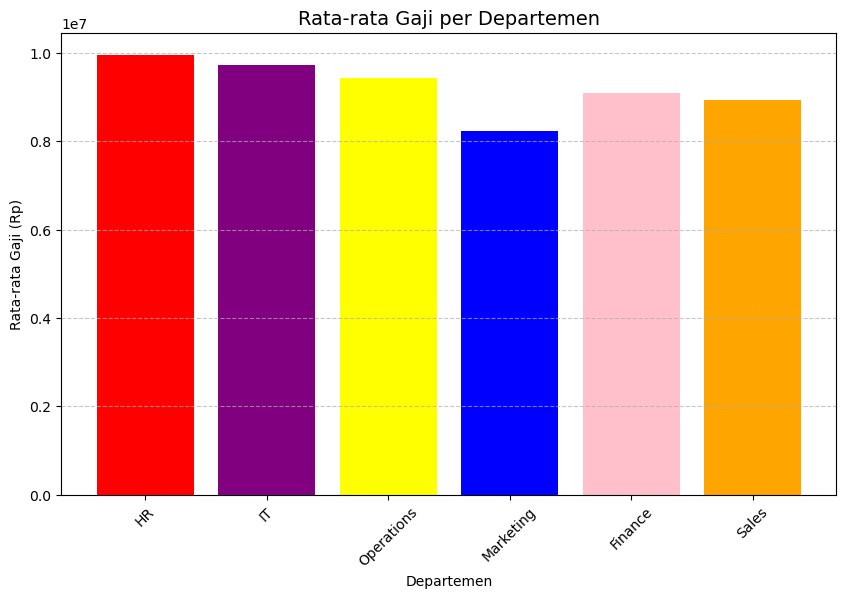

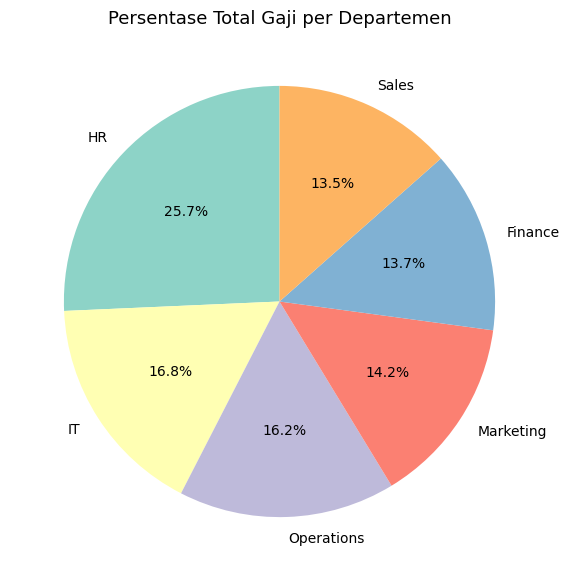

In [16]:
# Tugas 3 Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti SUM(), AVG(), COUNT(), serta JOIN antar tabel serta buat visualisasi yang menarik.
from pyspark.sql import SparkSession
import random
import matplotlib.pyplot as plt

# --- Inisialisasi Spark ---
spark = SparkSession.builder.appName("AnalisisKaryawan").getOrCreate()

# --- Dataset utama (employees) ---
departments = ["HR", "Finance", "IT", "Marketing", "Sales", "Operations"]
data = []
for i in range(100):
    data.append((
        i + 1,
        f"Employee_{i+1}",
        random.choice(departments),
        random.randint(22, 55),
        random.randint(4000000, 15000000)
    ))

columns = ["EmpID", "Name", "Department", "Age", "Salary"]
df = spark.createDataFrame(data, columns)
df.createOrReplaceTempView("employees")

# --- Dataset tambahan (departments) ---
dept_budget = [
    ("HR", 500000000),
    ("Finance", 600000000),
    ("IT", 800000000),
    ("Marketing", 700000000),
    ("Sales", 750000000),
    ("Operations", 650000000)
]
columns2 = ["Department", "Dept_Budget"]
departments_df = spark.createDataFrame(dept_budget, columns2)
departments_df.createOrReplaceTempView("departments")

# --- Analisis menggunakan SQL + JOIN ---
result = spark.sql("""
SELECT 
    e.Department,
    COUNT(e.EmpID) AS Jumlah_Karyawan,
    ROUND(AVG(e.Salary)) AS Rata2_Gaji,
    SUM(e.Salary) AS Total_Gaji,
    d.Dept_Budget AS Anggaran_Departemen
FROM employees e
JOIN departments d
ON e.Department = d.Department
GROUP BY e.Department, d.Dept_Budget
ORDER BY Total_Gaji DESC
""")

result.show()

# --- Visualisasi ---
pdf = result.toPandas()

# Grafik Batang
plt.figure(figsize=(10,6))
plt.bar(pdf["Department"], pdf["Rata2_Gaji"],
        color=['red','purple','yellow','blue','pink','orange']
        )
plt.title("Rata-rata Gaji per Departemen", fontsize=14)
plt.xlabel("Departemen")
plt.ylabel("Rata-rata Gaji (Rp)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(pdf["Total_Gaji"], labels=pdf["Department"],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Persentase Total Gaji per Departemen", fontsize=13)
plt.show()